In [ ]:
########################################
# ENTER YOUR NAME AND WISC EMAIL HERE: #
########################################

# Name: Arda Gurcan
# Email: grcan@wisc.edu

# Qiskit Fall Fest 2023

![QFF Logo](images/QFF-logo.png)

## Lab B: The Quantum Enigmas

- Difficulty: 2/5

- Estimated Time: 60 Minutes

Hi there and welcome to the **Qiskit Fall Fest**! 

As part of the Qiskit Fall Fest, IBM Quantum has created a series of coding challenges for you to work through. We like to call these "labs." Each lab centers on a different topic. Each lab also has a difficulty, and an estimated time, which you can find in the cell above.

There are dozens of different schools participating in the Fall Fest. You're part of a global event that has thousands of students learning about quantum computing. Congrats! Whether you're a beginner or a veteran, we hope you enjoy the Qiskit Fall Fest! We're glad you're here.

<center>
<img src="images/qe-logo.png" width="50%">
</center>

This lab is based on the Quantum Enigmas YouTube series, produced by the Institut Quantique at Sherbrooke University. **[Please watch video 001](https://www.youtube.com/watch?v=c1beJIg8lRs) in the Quantum Enigmas series.** This lab will be confusing to follow if you haven't already watched the video!

**Click here to watch ---> [Quantum Enigmas Episode 001](https://www.youtube.com/watch?v=c1beJIg8lRs)**

After you've watched the video, proceed to Part 1

In [1]:
## Run this cell to make sure your grader is setup correctly

%set_env QC_GRADE_ONLY=true
%set_env QC_GRADING_ENDPOINT=https://qac-grading.quantum-computing.ibm.com

env: QC_GRADE_ONLY=true
env: QC_GRADING_ENDPOINT=https://qac-grading.quantum-computing.ibm.com


# Part 1: Starting the Circuit

To repeat the core parts of the video -- there are two doors to choose from. One is correct, one is wrong. There's a Guardian next to each door, but one Guardian only tells the truth, while the other one only lies. We have no way of knowing which is which. Our job is to ask only one question to only one guardian and figure out which door is the correct door. 

In the video we saw how to translate the enigma of the two Guardians into a quantum circuit. Using Qiskit, let's build that circuit from the ground up and bring the enigma to life.

We saw that the circuit contains three qubits, one representing the first Guardian on the right, one representing the second Guardian on the left, and one qubit representing the "lie" that gets told. We don't know whether Guardian 1 or 2 is lying to us, so we use that third qubit as a way to perform operations *with each Guardian* to ensure we don't get caught in the lie. 

To start, we put the first Guardian into a superposition (using a Hadamard gate) then entangled the two Guardians so they shared the information (using a CNOT gate). We also put the lie qubit into superposition. Our circuit should look like this:

<center>
<img src="images/enigmas-circuit-1.png" width="25%">
</center>

In the code block below, we're made a new quantum circuit with 3 qubits and 3 classical bits. It is your job to build the circuit to match the above picture.

### Exercise 1

In the code below, apply an H gate to qubit 0, an H gate to qubit 2, and a CNOT gate between qubits 0 and 1

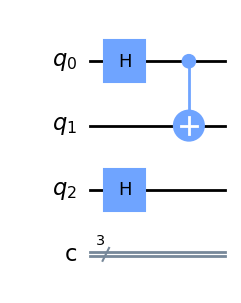

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3, 3)


## Write your code below this line ##
qc.h(0)
qc.h(2)
qc.cx(0,1)



## Do not change the code below here ##

answer1 = qc
qc.draw()

In [3]:
# Grader Cell: Run this to submit your answer
from qc_grader.challenges.fall_fest23 import grade_ex2a

grade_ex2a(answer1)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.


Nice job! 

We're going to build this circuit in pieces, then construct the full thing at the very end. Now that we have our Guardians and the lie qubit initialized, it's time to build the part of the circuit which accounts for the lie. We need to build a process which will evaluate if a guardian is lying, and then flip their answer if that's the case. We do *not* want to flip their answer if there is no lie detected. 

As a reminder, the lie qubit's measurement is how we know who is lying. When the lie qubit is measured as a 0, the **right** Guardian is lying. When the lie qubit is measured as a 1, the **left** Guardian is lying. But with our lie qubit in a superposition, we won't know who is lying until the end, so we need to build a process for each Guardian.

![Circuit 2](images/enigmas-circuit-2.png)

### Exercise 2

We only want to build the 2nd part of the circuit now, everything that appears to the right of the vertical dashed line (which we call a barrier). **You do not need to re-create the first part of the circuit.**

In the code block below, recreate the new part of the circuit you see above. Remember that the order in which you list the qubits within a CNOT gate matter! 

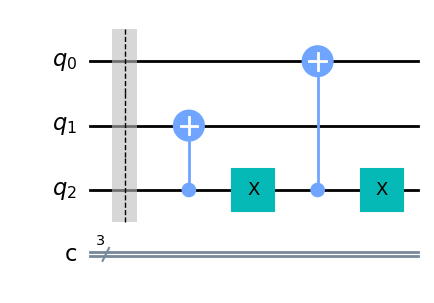

In [6]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3, 3)

qc.barrier(0, 1, 2)


## Write your code below this line ## 
qc.cx(2,1)
qc.x(2)
qc.cx(2,0)
qc.x(2)



## Do not change the code below this line ##


answer2 = qc
qc.draw()

In [7]:
# Grader Cell: Run this to submit your answer

from qc_grader.challenges.fall_fest23 import grade_ex2b

grade_ex2b(answer2)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.


# Part 2: The Truth Table

It's easy to lose track of what we're really doing when encoding a problem into a circuit. How do I remember which qubit is the Guardian? Or how do I know where the liar even is? In fact, what does the 0 or 1 even say at each step of the process? Does a 0 for the Guardian mean something different than a 0 for the "lie" qubit? 

In order to keep our bearings as we work through this problem, it's important to keep the facts straight. We're going to construct a truth table in order to do that. The table is filled with 0s and 1s, but we will add labels to help us quickly decipher what's going on.

Some reminders first:
- There are two Guardians represented by two qubits. `q[0]` is the Guardian on the right, while `q[1]` is the Guardian on the left
- When either Guardian's qubit is measured as 0, that's them telling us to pick the door on the right
- When either Guardian's qubit is measured as 1, that's them telling us to pick the door on the left
- We also have a third qubit, `q[2]` which we call the lie qubit
- When the lie qubit is measured as a 0, the right Guardian is lying
- When the lie qubit is measured as a 1, the left Guardian is lying

As a reminder, our circuit is only half-done at this point. So far we are setting up the problem, and asking the question "which door is the treasure behind?" That is *not* the same question we used in the video. This first half of the circuit is only about establishing which is the correct door. The second half of the circuit, which we'll build in Part 3, is where we ask the correct question. 

When we run the circuit, we have four possible current outcomes. Let's build a truth table to answer the question our circuit is currently asking: which door is the treasure behind? We'll start by using the qubit information, and display all four possible outcomes. Remember, 0 means right, 1 means left.

| q[2] | q[1] | q[0] |
|:---:|:---:|:---:|
| 0 | 0 | 1 | 
| 1 | 1 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 1 |

#### **That's really confusing!!** 

### Side note about qubit ordering 

In the table above, why is the first qubit we use all the way at the right side of the table? 

Good question! Qiskit uses little-endian ordering, which is a fancy way of saying that the most significant bit on the left, and the least significant on the right. So if we are reading the results like binary, we would start at the right and move our way to the left.

We do this on purpose. When you run an experiement and graph the results, they are presented in the same manner. Also, in this particular lab, it's helpful to know that "the guard on the right" is actually _on the right_ and the guard on the left is, similarly, _on the left._

In Qiskit, the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right. This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed. Importantly, this change in the representation of multi-qubit states affects the way multi-qubit gates are represented in Qiskit.

To make our truth table make more sense, let's replace the qubit number with the information it's describing. And let's also add a letter key, which we can use to write a full description. Remember, 0 means right, 1 means left.

| Who is Lying? | Guard on left says | Guard on right says | Description Letter |
|:---:|:---:|:---:|:---:|
| 0 | 0 | 1 | A |
| 1 | 1 | 0 | B |
| 0 | 1 | 0 | C |
| 1 | 0 | 1 | D |

Descriptions:
- A: The treasure is on the right, and the Guard on the right is the liar
- B: The treasure is on the right, and the Guard on the left is the liar
- C: The treasure is on the left, and the Guard on the right is the liar
- D: The treasure is on the left, and the Guard on the left is the liar

Let's break down just the first possible outcome, description A.

| Who is Lying? | Guard on left says | Guard on right says |
|:---:|:---:|:---:|
| 0 | 0 | 1 | 

The guard on the right is saying the treasure is behind the door on the left (`q[0] = 1`). The guard on the left is saying the treasure is behind the door on the right (`q[1] = 0`). But, the guard on the right is the liar (`q[2] = 0`). So if we know the guard on the right is the liar, and he's saying the treasure is behind the door on the left, then we **know** it must actually be behind the door on the right. We're using the lie qubit to give us an answer that we otherwise could not have known. 

### Exercise 3

Now it's time to test your understanding of the truth table. Answer the quiz questions below by following the same rules we established in the truth table. 

In [8]:
answer3: bool

## Quiz: evaluate the results and decide if the following statement is True or False

q0 = 1
q1 = 0
q2 = 1

## Based on this, is it TRUE or FALSE that the Guard on the left is a liar? 
## Assign your answer, either True or False, to answer3 below

answer3 = True

In [9]:
from qc_grader.challenges.fall_fest23 import grade_ex2c

grade_ex2c(answer3)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.


### Exercise 4

Another quiz question!

In [12]:
## Quiz: Fill in the correct numbers to make the following statement true: 
## The treasure is on the right, and the Guard on the left is the liar

q0 = 0
q1 = 1
q2 = 1

## HINT - Remember that Qiskit uses little-endian ordering

answer4 = [q0, q1, q2]

In [13]:
# Grader Cell: Run this to submit your answer

from qc_grader.challenges.fall_fest23 import grade_ex2d

grade_ex2d(answer4)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.


# Part 3: Finishing the Circuit

In order to finish our circuit, we need to remember the proper question from the video. The question we're asking is "which door would the other Guardian tell me **not** to open?" This question is phrased this way very deliberately. It ensures that no matter which Guardian we ask, the truth-teller or the liar, they both will give the same answer, the *correct* answer. 

However, so far our circuit has not accounted for this at all. In order to accomplish this, we need to introduce a new gate, **the swap gate.** This one is very straightforward, The SWAP gate swaps the states of two qubits. We apply is by simply calling the method `.swap(qubit1, qubit2)` on our quantum circuit.

The SWAP gate looks similar to a CNOT, but instead of a circle on each end of the line, you see two X's. You can see it as the very first gate in the last part of our circuit that we need to construct.

![Circuit 3](images/enigmas-circuit-3.png)


### Exercise 4 

Below we have provided the full circut, but taken out a handful of the gates. It's your job to fill those gates back in, and make your circuit mirror the correct one shown above.

NOTE - We did not remove any of the barriers, you do not need to worry about those. 

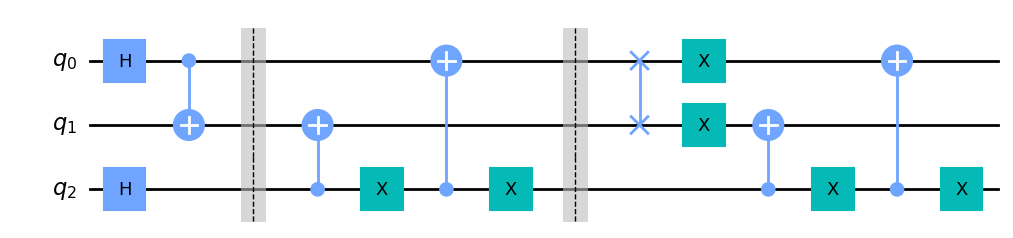

In [20]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)


## in the code below, fill in the missing gates. Run the cell to see a drawing of the current circuit ##


qc.h(0)
qc.h(2)
qc.cx(0,1)

qc.barrier(0, 1, 2)

qc.cx(2,1)
qc.x(2)

qc.cx(2, 0)
qc.x(2)
qc.barrier(0, 1, 2)
qc.swap(0,1)
qc.x(1)
qc.cx(2, 1)
qc.x(2)

qc.x(0)
qc.cx(2,0)

qc.x(2)


## Do not change any of the code below this line ##


answer5 = qc
qc.draw(output="mpl")

In [21]:
# Grader Cell: Run this to submit your answer

from qc_grader.challenges.fall_fest23 import grade_ex2e

grade_ex2e(answer5)

Grading your answer. Please wait...

Congratulations 🎉! Your answer is correct.


## Part 4: The Final Truth Table and Getting Results

You now have a complete circuit, congratulations! Before we run it, let's update our truth table. 

The first table we created was answering the question "where is the treasure?" but as we've discussed, the correct question we should be asking based on the video is **"which door would the other Guardian tell me not to open?"**

The results of asking that question are slightly different, and need to be written out to understand. 

| Who is Lying? | Guard on left says | Guard on right says | 
|:---:|:---:|:---:|
| 0 | 0 | 0 | 
| 0 | 1 | 1 |
| 1 | 0 | 0 | 
| 1 | 1 | 1 | 

You might be able to immedately spot the difference! In our first truth table, the two guards always said the opposite answer. However in our new table that answers the full question, the two guards always say the *same* answer! This ensures that no matter which Guardian we ask (remember, we only get to ask one), we will find out where the treasure is. 


Now that we have a finished circuit and a final truth table we can use to analyze the results, let's run the circuit and examine our output. In the cell below we've compiled everything together. Run this cell to execute the circuit 1000 times, then take a look at the graph that is created.

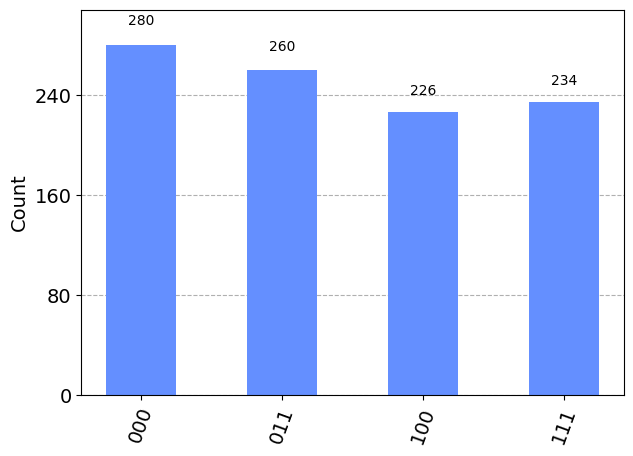

In [22]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram


## This is the full version of the circuit. Run it to see the results ##

quantCirc = QuantumCircuit(3)

quantCirc.h(0), quantCirc.h(2), quantCirc.cx(0, 1), quantCirc.barrier(0, 1, 2), quantCirc.cx(2, 1), quantCirc.x(2), quantCirc.cx(2, 0), quantCirc.x(2)
quantCirc.barrier(0, 1, 2), quantCirc.swap(0, 1), quantCirc.x(1), quantCirc.cx(2, 1), quantCirc.x(0), quantCirc.x(2), quantCirc.cx(2, 0), quantCirc.x(2)

# Execute the circuit and draw the histogram

measured_qc = quantCirc.measure_all(inplace=False)
backend = Aer.get_backend('qasm_simulator') # the device to run on
result = backend.run(transpile(measured_qc, backend), shots=1000).result()
counts  = result.get_counts(measured_qc)
plot_histogram(counts)


## Bonus Exercise -  Primitive and Sampler

#### Qiskit Runtime Primitives: Introducing Sampler

Let's give a more scientifically accurate explanation for why we run our circuits thousands of times. 

With respect to the main point of interest here, the core capability of quantum computers that sets them apart from classical computers is their ability to generate non-classical probability distributions as their outputs. The inherent nature of the highly probabilistic results we get require us to have multiple runs (shots) for the same circuit to generate usable information. That usable information is typically seen in the form of probability distributions. 

When the output we get is a probability distribution, one typical thing we might want to do is to sample from it.

So the main thing we do here is **sample probability distributions.** This brings us to something new: **The Sampler**

#### The Sampler

The Sampler is one of the first Qiskit Runtime **Primitives**. Primitives are core functions that make it easier to build modular algorithms and applications. In the future, we think the vast majority of people using quantum computers will do so using Qiskit Runtime.

The Sampler essentially does what it says in its name. By sampling from its output, it estimates the entire quasi-probability distribution of a given quantum circuit. This is a program that takes a user's circuit as an input and generates an error-mitigated readout of quasiprobabilities. This provides users a way to better evaluate shot results using error mitigation and enables them to more efficiently evaluate the possibility of multiple relevant data points in the context of destructive interference.

This is very similar to the familiar output of "counts" you usually get when you run a circuit. Here, however, you obtain a quasi-probability distribution output as a result of the error mitigation routine involved.

Simply put, you have access to a greater range of information data points that you can use however you like. 

The information obtained from a quasi-probability distribution representation may be of more relevance for investigating likelihoods of true probability distributions and computing unbiased expectation value points in exchange for a sampling overhead. These distributions, broadly speaking, can behave similar to true probability theory in some sense with the difference being that they have a few constraints of the original theory relaxed, one of which is the possiblity of having negative data points representing "negative" probability (but collectively still summing up to 1). These, which should not be mistaken for true probabilities, can be estimated to a nearest true probability distribution up to certain error boundary based on the context of usage. Few example use cases where Sampler could be of interest are: Grovers search, QSVM routines, Stabilizer computation, Optimization routines etc. 

Let's re-run the last exercise by using Sampler by using a same quantum circuit.

In [ ]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_distribution

sampler = Sampler()  


result = sampler.run(measured_qc, shots=1000).result()

probs = result.quasi_dists[0].binary_probabilities()
plot_distribution(probs)

## Congratulations!


Let's recap some of what you learned.

- When we run this circuit, each outcome has a 25% chance to be measured. After running 1000 times, your graph should show each answer has around 250 counts. This number is not a perfect 250 because probabilities are not perfect.
- Qiskit uses little-endian ordering.
- SWAP gates and Barriers are used to create more complex quantum circuits.

There are a few more Quantum Enigma videos waiting for you to watch and enjoy. Try watching [episode 2](https://www.youtube.com/watch?v=enXT5xTaPb8&list=PLtn704u3JW-J3yBVF7WVPHXCb4vkhmem9&index=3) and recreating that circuit yourself! Or, after each episode you can attempt the [Qiskit problem set](https://learn.qiskit.org/problem-sets/quantum_enigma_002/overview), built into the Qiskit textbook. 

Nice work, you've made it to the end of the second lab! You should feel very proud, but there's still more to learn. Enjoy the Qiskit Fall Fest. Good luck!